# Week 7 Assignment
### DSC 630
### Bellevue University
#### Yograj Karki
## DSC630, Assignment 7.2: Create Optimal Hotel Recommendations

Online travel agencies are scrambling to meet the artificial intelligence driven personalization standard set by companies like Amazon and Netflix. In addition, the world of online travel has become a highly competitive space where brands try to capture our attention (and wallet) with recommending, comparing, matching, and sharing. For this assignment, we would like to create the optimal hotel recommendations for Expedia’s users that are searching for a hotel to book. For this assignment, you need to predict which “hotel cluster” the user is likely to book, given his (or her) search details.<br>
<br>The data set can be found at Kaggle: Expedia Hotel Recommendations. To get started, I would suggest exploring the file train.csv, which contains the logs of user behavior.  There is another file named destinations.csv, which contains information related to hotel reviews made by users. There is a lot of data here, and making an accurate prediction is rather difficult, e.g., simply running a standard prediction algorithm will probably yield below 10% accuracy. Stary by doing some exploratory analysis of this data to help understand how to make a prediction on the hotel cluster the user is likely to select. Then, split train.csv into a training and test set (feel free to select a smaller random subset of train.csv). Then, build at least two prediction models from the training set, and report the accuracies on the test set. As I mentioned, this is a difficult problem, so be creative with your solutions. You might want to try building your own predictor rather than a standard predictor model, e.g., a random forest.  The purpose of this project is not necessarily to get great results but to understand the nuances and challenges of such problems.

# Exploratory Data Analysis

In [1]:
# Loading Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read CSV file
# filename = 'expedia-hotel-recommendations/train.csv'
# df = pd.read_csv(file)
  
# count no. of lines
# print("Number of lines in the file: ", len(df))

### Sampling the rows of the csv file since it's very large (taking 6.7 GB+ memory)

In [3]:
import random
random.seed(7)
import random

n = 37670293 #number of records in file
s = 100000 # arbitrary sample size
filename = "expedia-hotel-recommendations/train.csv"
skip = sorted(random.sample(range(1, n+1), n-s))
df = pd.read_csv(filename, skiprows=skip)

In [4]:
df.shape

(100000, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   date_time                  100000 non-null  object 
 1   site_name                  100000 non-null  int64  
 2   posa_continent             100000 non-null  int64  
 3   user_location_country      100000 non-null  int64  
 4   user_location_region       100000 non-null  int64  
 5   user_location_city         100000 non-null  int64  
 6   orig_destination_distance  64092 non-null   float64
 7   user_id                    100000 non-null  int64  
 8   is_mobile                  100000 non-null  int64  
 9   is_package                 100000 non-null  int64  
 10  channel                    100000 non-null  int64  
 11  srch_ci                    99899 non-null   object 
 12  srch_co                    99899 non-null   object 
 13  srch_adults_cnt            100

In [6]:
df.head()

date_time  site_name  posa_continent  user_location_country  \
0  2014-11-23 17:17:42         30               4                    195   
1  2014-05-26 12:22:03          2               3                     66   
2  2013-04-02 11:09:50         24               2                      3   
3  2014-09-12 12:14:54          2               3                     66   
4  2014-08-26 07:53:13          2               3                     66   

   user_location_region  user_location_city  orig_destination_distance  \
0                   991               47725                        NaN   
1                   174               21356                  2103.8393   
2                    50                5703                        NaN   
3                   348               48862                  3864.2730   
4                   322               48585                   224.9042   

   user_id  is_mobile  is_package  ...  srch_children_cnt srch_rm_cnt  \
0     1048          0           0  ...                  0           1   
1     7523          1           1  ...                  0           1   
2     9616          0           0  ...                  1           1   
3    10106          0           0  ...                  0           1   
4    14864          0           0  ...                  0           1   

  srch_destination_id  srch_destination_type_id  is_booking  cnt  \
0                8803                         1           0    1   
1                8791                         1           0    1   
2               20225                         6           0    1   
3                8799                         1           0    1   
4                8283                         1           0    1   

   hotel_continent  hotel_country  hotel_market  hotel_cluster  
0                3            151          1236             36  
1                4              8           110             87  
2                3            182            46             29  
3                6             46          1463             69  
4                2             50           414             42  

[5 rows x 24 columns]

In [7]:
# Drop any rows containing null values
df.dropna(axis=0, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64037 entries, 1 to 99999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date_time                  64037 non-null  object 
 1   site_name                  64037 non-null  int64  
 2   posa_continent             64037 non-null  int64  
 3   user_location_country      64037 non-null  int64  
 4   user_location_region       64037 non-null  int64  
 5   user_location_city         64037 non-null  int64  
 6   orig_destination_distance  64037 non-null  float64
 7   user_id                    64037 non-null  int64  
 8   is_mobile                  64037 non-null  int64  
 9   is_package                 64037 non-null  int64  
 10  channel                    64037 non-null  int64  
 11  srch_ci                    64037 non-null  object 
 12  srch_co                    64037 non-null  object 
 13  srch_adults_cnt            64037 non-null  int

## Graph Analysis

In [9]:
# Load Libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Set up chart style
sns.set_style("whitegrid")

# Set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 5)

<AxesSubplot:>

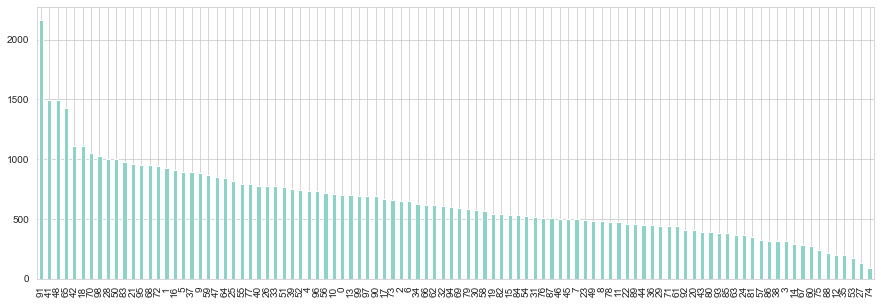

In [11]:
# Plot frequency for each hotel_clusters
df["hotel_cluster"].value_counts().plot(kind='bar',colormap="Set3",figsize=(15,5))

<AxesSubplot:>

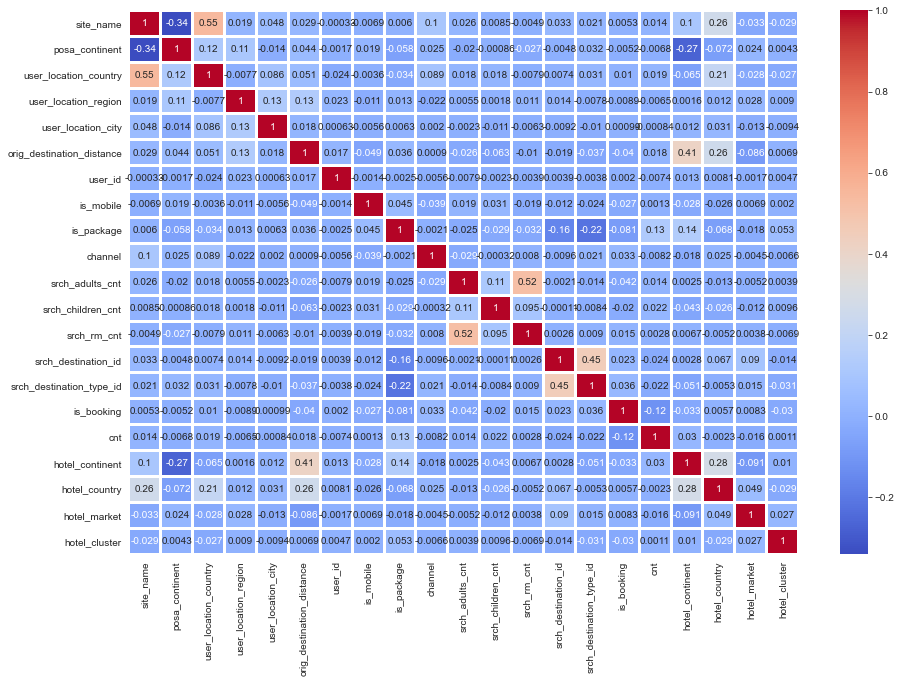

In [12]:
# heatmap
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.heatmap(df.corr(),cmap='coolwarm',ax=ax,annot=True,linewidths=2)

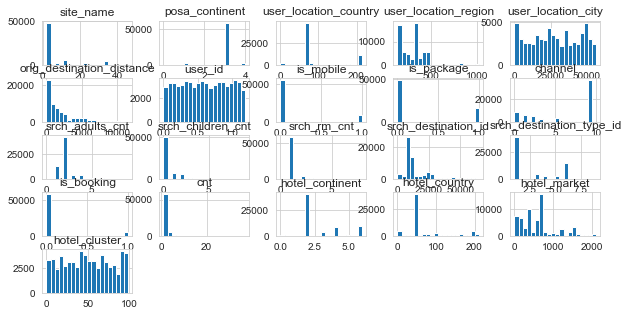

In [13]:
# plot histograms
hist = df.hist(bins=20)

## Feature Engineering


In [14]:
# Dropping the user_id column as it has no significance for the model
df = df.drop(['user_id'], axis=1)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64037 entries, 1 to 99999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date_time                  64037 non-null  object 
 1   site_name                  64037 non-null  int64  
 2   posa_continent             64037 non-null  int64  
 3   user_location_country      64037 non-null  int64  
 4   user_location_region       64037 non-null  int64  
 5   user_location_city         64037 non-null  int64  
 6   orig_destination_distance  64037 non-null  float64
 7   is_mobile                  64037 non-null  int64  
 8   is_package                 64037 non-null  int64  
 9   channel                    64037 non-null  int64  
 10  srch_ci                    64037 non-null  object 
 11  srch_co                    64037 non-null  object 
 12  srch_adults_cnt            64037 non-null  int64  
 13  srch_children_cnt          64037 non-null  int

#### I'm going to create some additional features from date columns

* stay_dur: number of duration of stay
* Cin_day: Check-in day
* Cin_month: Check-in month
* Cin_year: Check-out year

In [16]:
def convert_date_into_days(df):
    df['srch_ci'] = pd.to_datetime(df['srch_ci'])
    df['srch_co'] = pd.to_datetime(df['srch_co'])
    df['date_time'] = pd.to_datetime(df['date_time'])
    
    ## New columns
    df['stay_dur'] = (df['srch_co'] - df['srch_ci']).astype('timedelta64[D]')
    # For hotel check-in
    # Month, Year, Day
    df['Cin_day'] = df["srch_ci"].apply(lambda x: x.day)
    df['Cin_month'] = df["srch_ci"].apply(lambda x: x.month)
    df['Cin_year'] = df["srch_ci"].apply(lambda x: x.year)

In [17]:
# Applying the function
convert_date_into_days(df)

In [18]:
df.head(1)

date_time  site_name  posa_continent  user_location_country  \
1 2014-05-26 12:22:03          2               3                     66   

   user_location_region  user_location_city  orig_destination_distance  \
1                   174               21356                  2103.8393   

   is_mobile  is_package  channel  ... is_booking cnt  hotel_continent  \
1          1           1        9  ...          0   1                4   

   hotel_country  hotel_market  hotel_cluster  stay_dur  Cin_day  Cin_month  \
1              8           110             87       3.0       31          5   

   Cin_year  
1      2014  

[1 rows x 27 columns]

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64037 entries, 1 to 99999
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date_time                  64037 non-null  datetime64[ns]
 1   site_name                  64037 non-null  int64         
 2   posa_continent             64037 non-null  int64         
 3   user_location_country      64037 non-null  int64         
 4   user_location_region       64037 non-null  int64         
 5   user_location_city         64037 non-null  int64         
 6   orig_destination_distance  64037 non-null  float64       
 7   is_mobile                  64037 non-null  int64         
 8   is_package                 64037 non-null  int64         
 9   channel                    64037 non-null  int64         
 10  srch_ci                    64037 non-null  datetime64[ns]
 11  srch_co                    64037 non-null  datetime64[ns]
 12  srch

/Users/ykarki1/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cin_month', ylabel='count'>

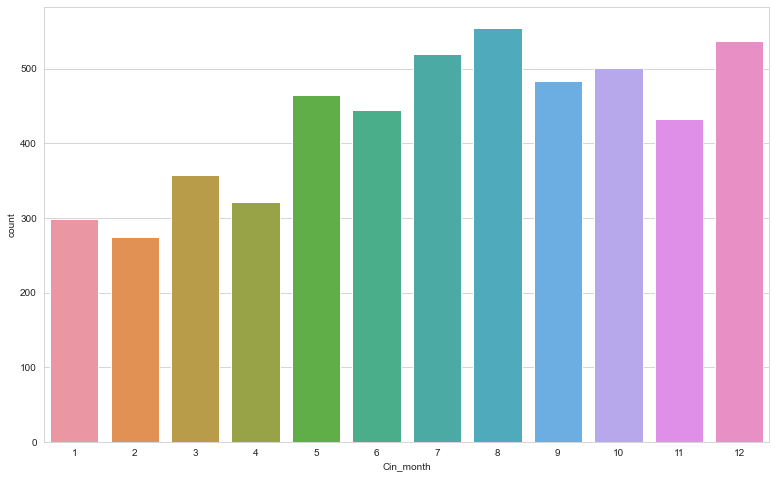

In [20]:
# Count the bookings in each month
fig, ax = plt.subplots()
fig.set_size_inches(13, 8)
sns.countplot('Cin_month',data=df[df["is_booking"] == 1],order=list(range(1,13)),ax=ax)

/Users/ykarki1/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cin_day', ylabel='count'>

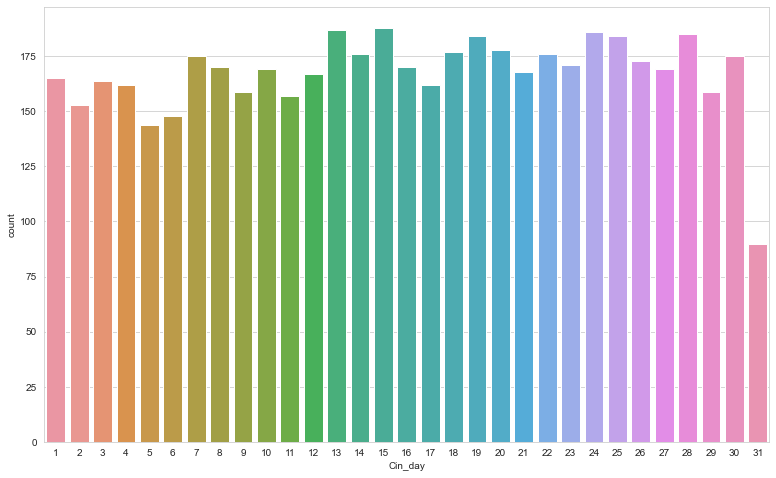

In [21]:
# Count the bookings as per the day
fig, ax = plt.subplots()
fig.set_size_inches(13, 8)
sns.countplot('Cin_day',data=df[df["is_booking"] == 1],order=list(range(1,32)),ax=ax)

/Users/ykarki1/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stay_dur', ylabel='count'>

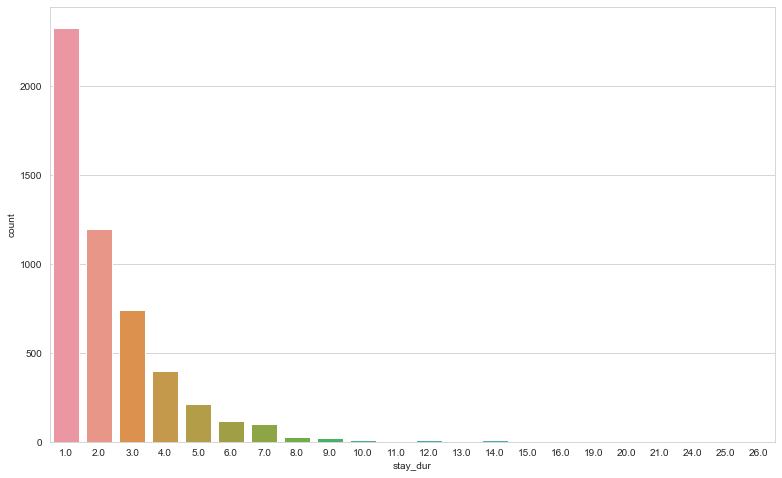

In [22]:
# Count the bookings as per the stay_duration
fig, ax = plt.subplots()
fig.set_size_inches(13, 8)
sns.countplot('stay_dur',data=df[df["is_booking"] == 1],ax=ax)

### Missing values

In [23]:
# Check the percentage of NaN in dataset
#total = df.isnull().sum().sort_values(ascending=False)
#percent = (df.isnull().sum()/df['hotel_cluster'].count()).sort_values(ascending=False)*100
#missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
#missing_data

In [24]:
# Fill nan with the day which has max occurence
#df['Cin_day'] = df['Cin_day'].fillna(26.0)
#df['Cin_month'] = df['Cin_month'].fillna(8.0)
#df['Cin_year'] = df['Cin_year'].fillna(2014.0)
#df['stay_dur'] = df['stay_dur'].fillna(1.0)

# Fill average values in place for nan, fill with mean
#df['orig_destination_distance'].fillna(df['orig_destination_distance'].mean(), inplace=True)

In [25]:
# Get list of categorical variable columns
catCols = ['site_name', 'posa_continent', 'user_location_country', 
           'user_location_region', 'user_location_city', 
           'channel', 'srch_destination_id', 'srch_destination_type_id', 
           'hotel_continent', 'hotel_country', 'hotel_market']


In [26]:
# Function to convert to categorical
def to_category(col, df=df):
    df[col] = df[col].astype('category')
    
for col in catCols:
    to_category(col)

In [27]:
# Converts a column to binary based on matching / not matching value
def cat_to_binary(row, col, val):
    if row[col] == val:
        return 1
    return 0


# Converts anything over a particular value to a certain value
def bin_vals(row, col, val):
    if row[col] > val:
        return val
    return row[col]

In [28]:
# Data Transformations and new feature creation
df['site_name_2'] = df.apply(lambda row: cat_to_binary(row, 'site_name', 2), axis=1)
df['posa_continent_3'] = df.apply(lambda row: cat_to_binary(row, 'posa_continent', 3), axis=1)
df['user_location_country_66'] = df.apply(lambda row: cat_to_binary(row, 'user_location_country', 66), axis=1)
df['user_location_region'] = df.apply(lambda row: bin_vals(row, 'user_location_region', 500), axis=1)
df['hotel_country'] = df.apply(lambda row: cat_to_binary(row, 'hotel_country', 50), axis=1)

In [29]:
# Look at variables
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64037 entries, 1 to 99999
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date_time                  64037 non-null  datetime64[ns]
 1   site_name                  64037 non-null  category      
 2   posa_continent             64037 non-null  category      
 3   user_location_country      64037 non-null  category      
 4   user_location_region       64037 non-null  int64         
 5   user_location_city         64037 non-null  category      
 6   orig_destination_distance  64037 non-null  float64       
 7   is_mobile                  64037 non-null  int64         
 8   is_package                 64037 non-null  int64         
 9   channel                    64037 non-null  category      
 10  srch_ci                    64037 non-null  datetime64[ns]
 11  srch_co                    64037 non-null  datetime64[ns]
 12  srch

In [30]:
df.columns

Index(['date_time', 'site_name', 'posa_continent', 'user_location_country',
       'user_location_region', 'user_location_city',
       'orig_destination_distance', 'is_mobile', 'is_package', 'channel',
       'srch_ci', 'srch_co', 'srch_adults_cnt', 'srch_children_cnt',
       'srch_rm_cnt', 'srch_destination_id', 'srch_destination_type_id',
       'is_booking', 'cnt', 'hotel_continent', 'hotel_country', 'hotel_market',
       'hotel_cluster', 'stay_dur', 'Cin_day', 'Cin_month', 'Cin_year',
       'site_name_2', 'posa_continent_3', 'user_location_country_66'],
      dtype='object')

In [31]:
# Load libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [32]:
final_df = df[['user_location_region', 'user_location_city',
       'orig_destination_distance', 'is_mobile', 'is_package', 'channel',
       'srch_adults_cnt', 'srch_children_cnt',
       'srch_rm_cnt', 'srch_destination_id', 'srch_destination_type_id',
       'is_booking', 'cnt', 'hotel_continent', 'hotel_country', 'hotel_market',
       'hotel_cluster', 'stay_dur', 'Cin_day', 'Cin_month', 'Cin_year',
       'site_name_2', 'posa_continent_3', 'user_location_country_66']].copy()

## Split data

In [33]:
# Set up features target sets
X = final_df.drop(['hotel_cluster'], axis=1)
y = final_df['hotel_cluster']

# Encode the target variables
le = LabelEncoder()
y = le.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.25, random_state=7)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_test  = scaler.transform(X_test)

In [41]:
# Set up dictionary for model results
models_dict = {}

#### Logistic Regression

In [39]:
# Load libraries
from sklearn.linear_model import LogisticRegression

# Create classification model
logistic = LogisticRegression(random_state=7, n_jobs=-1)

In [42]:
# Fit model
models_dict['Logistic'] = logistic.fit(X_train, y_train)

#### Random Forest

In [43]:
# Load libraries
from sklearn.ensemble import RandomForestClassifier

# Create classification model
rfclassifier = RandomForestClassifier(random_state=7, n_jobs=-1)

In [44]:
# Fit model
models_dict['RandomForest'] = rfclassifier.fit(X_train, y_train)

#### Decision Tree

In [45]:
# Load libraries
from sklearn.tree import DecisionTreeClassifier

# Create classification model
decisiontree = DecisionTreeClassifier(random_state=7, 
                                      class_weight='balanced')

In [46]:
# Fit model
models_dict['DecisionTree'] = decisiontree.fit(X_train, y_train)

#### AdaBoost

In [47]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier

# Create classification model
adaboost = AdaBoostClassifier(random_state=7)

In [48]:
# Fit model
models_dict['AdaBoost'] = adaboost.fit(X_train, y_train)

#### Support Vector Classifier (SVC)

In [49]:
# Load libraries
from sklearn.svm import SVC

# Create classification model
svc = SVC(random_state=42)

In [50]:
# Fit model
models_dict['SVC'] = svc.fit(X_train, y_train)

#### Gaussian Naive Bayes Classifier

In [51]:
# Load libraries
from sklearn.naive_bayes import GaussianNB

# Create Gaussian naive Bayes object
nBayes = GaussianNB()

In [52]:
# Fit model
models_dict['GaussianNB'] = nBayes.fit(X_train, y_train)

#### Compare Accuracy Scores

In [53]:
# Create lists of models and accuracy scores
modelName = []
score = []
for key in models_dict:
    modelName += [key]
    model = models_dict[key]
    value = model.score(X_test, y_test)*100
    score += [round(value, 2)]

# Create DataFrame of results
d = {'Model': modelName, 'Accuracy': score}
results = pd.DataFrame(d).sort_values(by=['Accuracy'], ascending=False)
results

Model  Accuracy
1  RandomForest     10.31
4           SVC      7.91
2  DecisionTree      7.88
0      Logistic      7.38
3      AdaBoost      5.18
5    GaussianNB      3.62

### Random Forest Classifier seems have the highest accuracy among others.